# create room

In [27]:
import pyroomacoustics as pra

# The desired reverberation time and dimensions of the room
rt60 = 0.5  # seconds
room_dim = [3,3,2.5]  # meters

# We invert Sabine's formula to obtain the parameters for the ISM simulator
e_absorption, max_order = pra.inverse_sabine(rt60, room_dim)
m = pra.make_materials(
    ceiling="hard_surface",
    floor="chairs_wooden",
    east="curtains_velvet",
    west="chairs_heavy_upholstered",
    north="hard_surface",
    south="hard_surface",
)


# Create the room
room = pra.ShoeBox(
    room_dim, fs=96000, materials=m, max_order=max_order , air_absorption=True
)

'DevNode2_ex16_413.wav'

# source


In [29]:
from signal_generator import signal_generator,audio_interface 
sg=signal_generator(sr=96000)
logsweep=sg.logsweep(w1=100,w2=30000,T=0.1)

room.add_source([1,1,1], signal=logsweep.signal, delay=0.0)

import numpy as np
mic_locs = np.c_[
    [1,1.1,1],

]

# finally place the array in the room
room.add_microphone_array(mic_locs)

# RIR

In [8]:
import numpy as np
from signal_generator import signal_generator,audio_interface 
#sg=signal_generator(sr=96000)

b_rir=np.genfromtxt('data/bathroom/rir_002.csv',delimiter=",")
l_rir=np.genfromtxt('data/livingroom/rir_001.csv',delimiter=",")
t_rir=np.genfromtxt('data/toilet/rir_000.csv',delimiter=",")

b_sig=np.genfromtxt('data/bathroom/signal_002.csv',delimiter=",")
l_sig=np.genfromtxt('data/livingroom/signal_001.csv',delimiter=",")
t_sig=np.genfromtxt('data/toilet/signal_000.csv',delimiter=",")

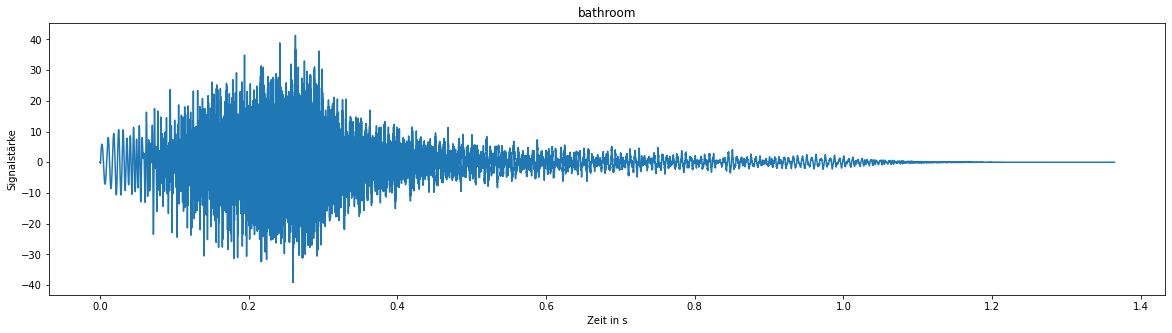

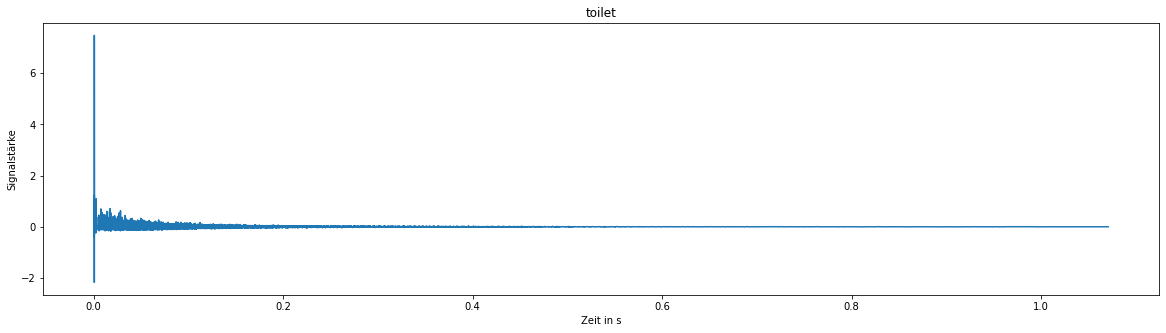

In [13]:
import h5py
from signal_generator import signal_generator,audio_interface 
sg=signal_generator(sr=96000)
import sounddevice as sd

with h5py.File('data/toilet/000.h5',"r") as f:
    sg.plot_signal(f["signal"],title="bathroom",sr=96000)
    sg.plot_signal(f["rir"],title="toilet",sr=96000)
    sd.play(f["signal"][:100000],96000,1,blocking=True)


In [59]:
import sounddevice as sd

rec=sd.play(t_sig[1][:100000],96000,1,blocking=True)


In [13]:
b_rir[i]

array([-0.03339, -0.0334 , -0.03341, ...,  0.     ,  0.     ,  0.     ])

In [6]:
sg=signal_generator(sr=96000)

i=0
sg.plot_signal(b_rir[i],title="bathroom",sr=96000)
sg.plot_signal(l_rir[i],title="livingroom",sr=96000)
sg.plot_signal(t_rir[i],title="toilet",sr=96000)

sg.plot_signal(b_sig[i],title="bathroom",sr=96000)
sg.plot_signal(l_sig[i],title="livingroom",sr=96000)
sg.plot_signal(t_sig[i],title="toilet",sr=96000)

TypeError: object of type 'numpy.float64' has no len()

<Figure size 1440x360 with 0 Axes>

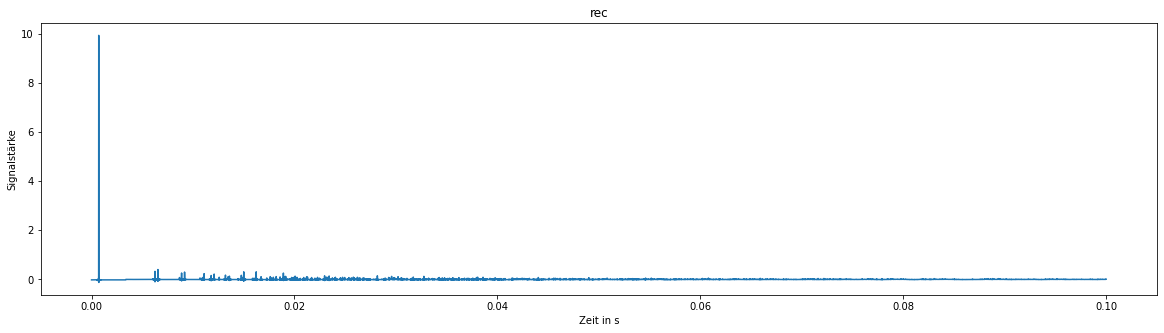

In [3]:
room.compute_rir()


# plot the RIR between mic 1 and source 0
import matplotlib.pyplot as plt

sg.plot_signal(room.rir[0][0][:int(96000*0.1)],title="rec")
#sg.plot_signal(room.rir[1][0][:int(96000*0.1)],title="rec")
#sg.plot_signal(room.rir[2][0][:int(96000*0.1)],title="rec")
#sg.plot_signal(room.rir[3][0][int(96000*0.01):int(96000*0.1)],title="rec")



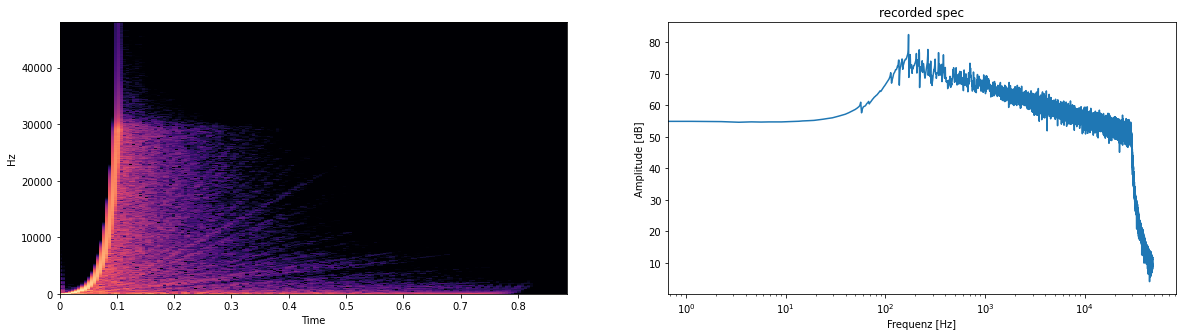

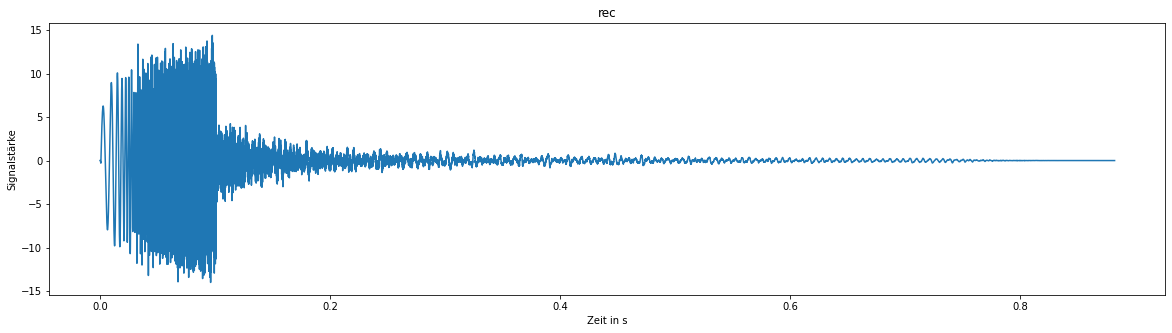

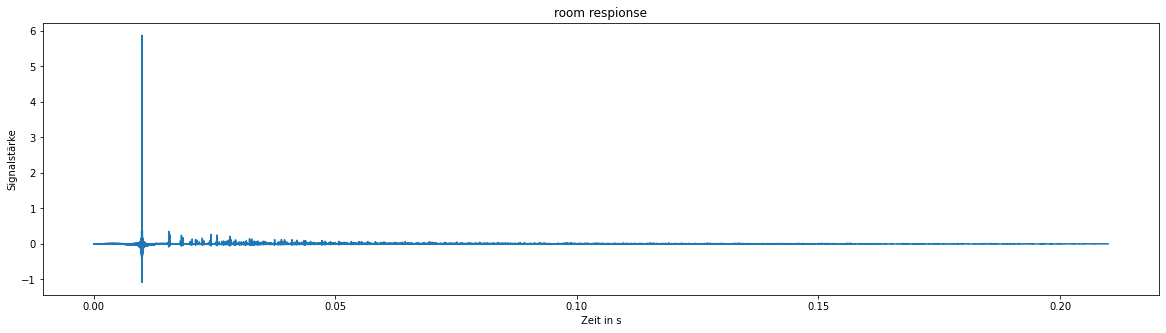

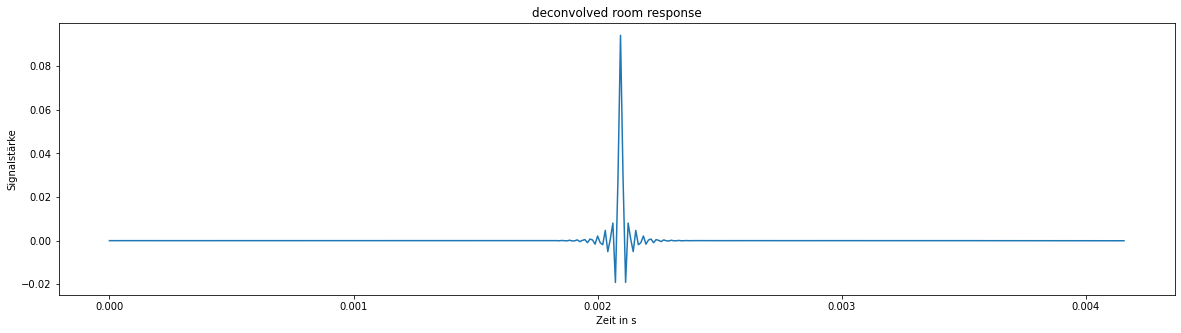

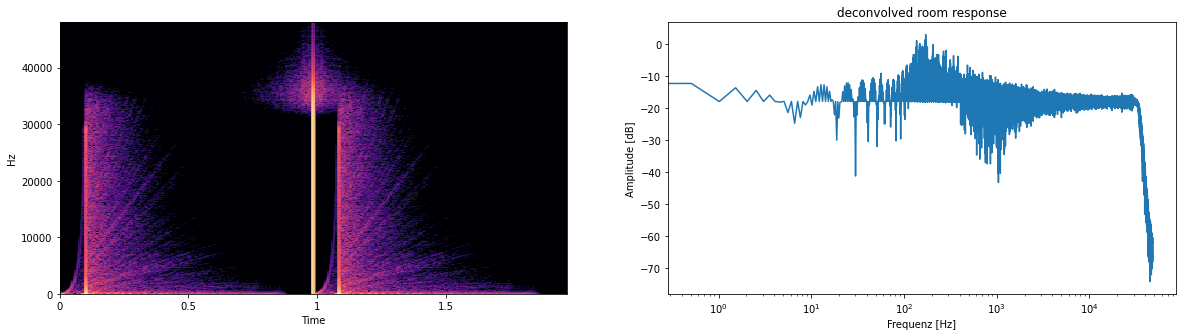

In [31]:
import scipy.fftpack
import scipy.signal
from scipy.fftpack import fft, ifft
from scipy.signal import fftconvolve, convolve, kaiser
import numpy as np
room.simulate()
rec=room.mic_array.signals[0,:]

sg.plot_spec(rec,title="recorded spec")
sg.plot_signal(rec,title="rec")

room_response = fftconvolve( rec, logsweep.inverse(), mode='full')
#room_response=room_response[int(96000*1.52):int(96000*1.52)+5000]
#room_response=room_response[int(room_response.shape[0]/2)-5000:int(room_response.shape[0]/2)+5000]
#room_response=room_response[logsweep.inverse().shape[0]:logsweep.inverse().shape[0]*2+1]
start=np.argmax(room_response)
sg.plot_signal(room_response[start-int(96000*0.01):start+int(96000*0.2)],title="room respionse")

# Derive inverted room response for active room correction.
Hi = fft(room_response)
lmbd = 1e-2
# Perform Weiner deconvolution.
inv_room_response = np.real(ifft(np.conj(Hi)/(Hi*np.conj(Hi) + lmbd**2)))
inv_room_response /= np.max(np.abs(inv_room_response))

deconvolved_ir = fftconvolve(room_response, inv_room_response)

sg.plot_signal(deconvolved_ir[int(deconvolved_ir.shape[0]/2)-200:int(deconvolved_ir.shape[0]/2)+200],title="deconvolved room response")
sg.plot_spec(deconvolved_ir,title="deconvolved room response")

#deconvolved_sweep = fftconvolve(rec, inv_room_response[::48000])
#sg.plot_spec(deconvolved_sweep,title="deconvolved sine")
#sg.plot_signal(deconvolved_sweep,title="deconvolved sine")

In [1]:
import numpy as np
from scipy.io import wavfile
import random
import os
import matplotlib.pyplot as plt
from room_simulator import room_simulator as rs

In [1]:
import numpy as np
from scipy.io import wavfile
import random
import os
import matplotlib.pyplot as plt
from room_simulator import room_simulator as rs

for i in range(20):
    room=None
    room=rs(N_mutations_per_roomtype=1,roomtype="livingroom").rooms[0]
    room.simulate()
    room.mic_array.to_wav(
        "test/living"+str(i)+".wav",
        norm=True,
        bitdepth=np.int16,
    )
    print(".")


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [6]:
new_audio.shape

(48000, 4)

In [2]:
import numpy as np
from scipy.io import wavfile
import random
import os
import matplotlib.pyplot as plt
from room_simulator import room_simulator as rs
room=rs(N_mutations_per_roomtype=1,roomtype="livingroom").rooms[0]
room.simulate()
room.mic_array.to_wav(
    "test.wav",
    norm=True,
    bitdepth=np.int16,)

In [1]:
from scipy import interpolate


old_samplerate, old_audio = wavfile.read("../../data/audio/DevNode1_ex46_154.wav")

duration = old_audio.shape[0] / old_samplerate
time_old  = np.linspace(0, duration, old_audio.shape[0])
time_new  = np.linspace(0, duration, int(old_audio.shape[0] * 49000 / old_samplerate))
interpolator = interpolate.interp1d(time_old, old_audio.T)
new_audio = interpolator(time_new).T.astype('int16') 

import sounddevice as sd

rec=sd.play(new_audio.T[0],49000,1,blocking=True)

NameError: name 'wavfile' is not defined

In [48]:
new_audio.T[0]

array([ -800.,  -896.,  -768., ..., -1008., -1104., -1072.])

In [49]:
old_audio.T[0]

array([ -800,  -896,  -768, ..., -1008, -1104, -1072], dtype=int16)

In [52]:
rec=sd.play(new_audio.T[0].astype('int16') ,16000,1,blocking=True)